<a href="https://colab.research.google.com/github/PanavShah1/deep_learning/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [41]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [42]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.3.0+cu121


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [43]:
from torchvision import datasets
from torchvision import transforms
train_dataset = datasets.MNIST(root="root",
                               train=True,
                               download=True,
                               transform=transforms.ToTensor(),
                               target_transform=None)
test_dataset = datasets.MNIST(root="root",
                              train=False,
                              download=True,
                              transform=transforms.ToTensor(),
                              target_transform=None)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [44]:
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: root
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: root
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [45]:
class_names = train_dataset.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [46]:
image, label = train_dataset[0]
image.shape, label

(torch.Size([1, 28, 28]), 5)

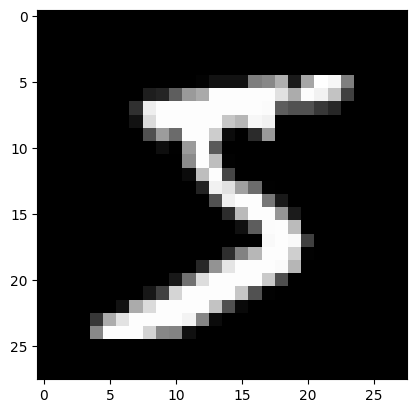

In [47]:
import matplotlib.pyplot as plt
plt.imshow(image.squeeze(), cmap="gray")

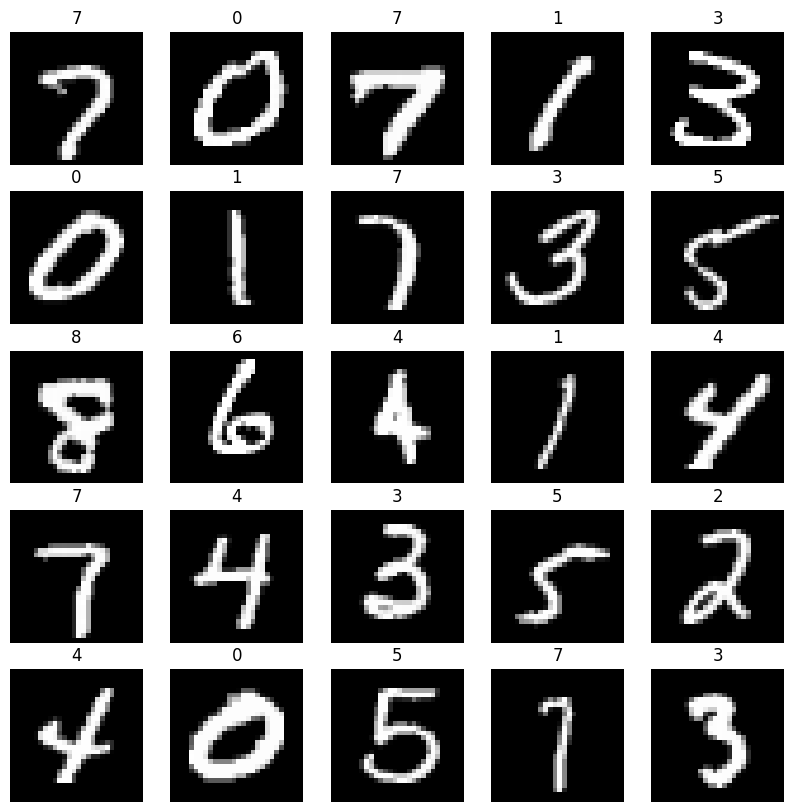

In [48]:
import random

rows, cols = 5, 5

fig = plt.figure(figsize=(10, 10))
for i in range(rows*cols):
  fig.add_subplot(rows, cols, i+1)
  rand_idx = random.randint(0, len(train_dataset))
  image, label = train_dataset[rand_idx]
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(label)
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [49]:
from torch.utils.data import DataLoader

test_batch = DataLoader(train_dataset, batch_size=32, shuffle=True)
train_batch = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [50]:
test_batch, train_batch

(<torch.utils.data.dataloader.DataLoader at 0x7d69c1e13fd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d69c1e12380>)

In [51]:
temp_batch = next(iter(test_batch))
temp_batch

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [58]:
from torch import nn
class MNISTModelV0(nn.Module):
  def __init__(self, input_shape, hidden_layers, output_shape):
    super().__init__()
    self.layer_stack_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_layers,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layers,
                  out_channels=hidden_layers,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.layer_stack_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_layers,
                  out_channels=hidden_layers,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layers,
                  out_channels=hidden_layers,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.layer_stack_3 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_layers*49,
                  out_features=len(class_names))
    )

  def forward(self, x):
    x = self.layer_stack_1(x)
    print(x.shape)
    x = self.layer_stack_2(x)
    print(x.shape)
    x = self.layer_stack_3(x)
    print(x.shape)
    return x

model_0 = MNISTModelV0(input_shape=1,
                       hidden_layers=10,
                       output_shape=len(class_names))

temp = model_0(image.unsqueeze(dim=1))
temp

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10])


tensor([[-0.0259, -0.0140,  0.0049, -0.0234, -0.0112, -0.0238,  0.0581,  0.0036,
         -0.0605, -0.0641]], grad_fn=<AddmmBackward0>)

In [61]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                         lr=0.1)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 5

for epoch in range(epochs):
  model_0.eval()


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?